In [1]:
import datetime as dt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from salishsea_tools import evaltools
from salishsea_tools import viz_tools

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/evaltools.py:46: UserWarning: Neither Python Excel module ('openpyxl','xlrd') found
  warnings.warn("Neither Python Excel module ('openpyxl','xlrd') found",UserWarning)


In [2]:
def Plot_scatter_NS(data, suptitle, filename):
    fig = plt.figure(figsize = (7.5, 9.5))
    gs1 = gridspec.GridSpec(3, 4, left=.08, right=0.91, bottom=0.1, top=0.97,
                      wspace=0.2, width_ratios=[1, 0.1, 1, 0.1])
    axT = fig.add_subplot(gs1[1, 0])
    axS = fig.add_subplot(gs1[1, 2])
    axC = fig.add_subplot(gs1[2, 0])
    axL = fig.add_subplot(gs1[2, 2])
    gscb = gridspec.GridSpecFromSubplotSpec(7, 1, subplot_spec=gs1[1, 3])
    axcb = fig.add_subplot(gscb[1:-1])

    iiT = (~np.isnan(data['N'])) & (~np.isnan(data['mod_nitrate']))
    iiS = (~np.isnan(data['Si'])) & (~np.isnan(data['mod_silicon']))
    
    mod_chl_N = 2
    data['l10_obsChl']=np.log10(data['Chl']+0.001)
    data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.001)
    data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
    
    iiC = (~np.isnan(data['Chl'])) & (~np.isnan(data['mod_Chl']))
    
    Smin, Smax = 0, 82
    Tmin, Tmax = 0, 35
    Cmin, Cmax = 0, 20
    Lmin, Lmax = -1, 2
    
    counts, xedges, yedges, m1 = axT.hist2d(data.loc[iiT,['N']].values.flatten(),
                                      data.loc[iiT,['mod_nitrate']].values.flatten(), bins=50, norm=LogNorm())
    counts, xedges, yedges, m2 = axS.hist2d(data.loc[iiS,['Si']].values.flatten(),
                                      data.loc[iiS,['mod_silicon']].values.flatten(), bins=50, norm=LogNorm())
    
    axC.plot(data.loc[iiC,['Chl']].values.flatten(),
                                      data.loc[iiC,['mod_Chl']].values.flatten(), '.')
    axL.plot(data.loc[iiC,['l10_obsChl']].values.flatten(),
                                      data.loc[iiC,['l10_modChl']].values.flatten(), '.')

    cb = fig.colorbar(m1, cax=axcb)
    cb.set_label('Count')

    
    ntick = np.arange(Smin, Smax, 10)
    ntickl = [str(i) for i in ntick]
    axS.set_xlim((Smin, Smax))
    axS.set_ylim((Smin, Smax))
    axS.set_xticks(ntick)
    axS.set_xticklabels(ntickl)
    axS.set_yticks(ntick)
    axS.set_yticklabels(ntickl)

    stick = np.arange(Tmin, Tmax, 10)
    stickl = [str(i) for i in stick]
    axT.set_xlim((Tmin, Tmax))
    axT.set_ylim((Tmin, Tmax))
    axT.set_xticks(stick)
    axT.set_xticklabels(stickl)
    axT.set_yticks(stick)
    axT.set_yticklabels(stickl)
    
    ctick = np.arange(Cmin, Cmax, 5)
    ctickl = [str(i) for i in ctick]
    axC.set_xlim((Cmin, Cmax))
    axC.set_ylim((Cmin, Cmax))
    axC.set_xticks(ctick)
    axC.set_xticklabels(ctickl)
    axC.set_yticks(ctick)
    axC.set_yticklabels(ctickl)
    
    ltick = np.arange(Lmin, Lmax, 0.5)
    ltickl = [str(i) for i in ltick]
    axL.set_xlim((Lmin, Lmax))
    axL.set_ylim((Lmin, Lmax))
    axL.set_xticks(ltick)
    axL.set_xticklabels(ltickl)
    axL.set_yticks(ltick)
    axL.set_yticklabels(ltickl)
    
    axS.plot((Smin, Smax), (Smin, Smax), 'k-', alpha=0.2)
    axT.plot((Tmin, Tmax), (Tmin, Tmax), 'k-', alpha=0.2)
    axC.plot((Cmin, Cmax), (Cmin, Cmax), 'k-', alpha=0.2)
    axL.plot((Lmin, Lmax), (Lmin, Lmax), 'k-', alpha=0.2)
    
    for ax in (axT,axS, axC, axL):
        ax.set_aspect(1, adjustable='box')
        ax.set_ylabel('Modeled', fontsize=10)
        ax.set_xlabel('Observed', fontsize=10)

    axT.set_title('N (mmol m$^{-3}$)', fontsize=12, y=0.8)
    axS.set_title('Si (mmol m$^{-3}$)', fontsize=12, y=0.8)
    axC.set_title('Chl (mg m$^{-3}$)', fontsize=12, y=0.8)
    axL.set_title('log$_{10}$ Chl (mg m$^{-3}$)', fontsize=12, y=0.8)
    
    axM = fig.add_subplot(gs1[0, 2])
    viz_tools.set_aspect(axM, coords='map')
    axM.plot(data['Lon'], data['Lat'], 'r.', label='matched obs')
    bathy = '/home/sallen/MEOPAR/grid/bathymetry_201702.nc'
    viz_tools.plot_land_mask(axM, bathy, coords='map', color='burlywood')
    axM.set_ylim(48, 50.5)
    axM.legend()
    axM.set_xlim(-125.7, -122.5);
    
    axW = fig.add_subplot(gs1[0, 0])
    axW.set(xlim=(0, 1), ylim=(0, 1))
    axW.text(0, 1, suptitle, fontsize=14)
    N, modmean, obsmean, bias, RMSE, WSS = evaltools.stats(data['N'], data['mod_nitrate'])
    axW.text(0, 0.55, f'For Nitrate+Nitrite\n (mmol m$^{{-3}}$)\n Bias: {bias: .2}\n RMSE: {RMSE: .2}\n WSS: {WSS: .3}\n for N: {N}')
    
    N, modmean, obsmean, bias, RMSE, WSS = evaltools.stats(data['Si'], data['mod_silicon'])
    axW.text(0, 0.1, f'For dissolved Silicon\n (mmol m$^{{-3}}$)\n Bias: {bias: .2}\n RMSE: {RMSE: .2}\n WSS: {WSS: .3}\n for N: {N}')
    
    N, modmean, obsmean, bias, RMSE, WSS = evaltools.stats(data['Chl'], data['mod_Chl'])
    axW.text(0.6, 0.55, f'For Chlorophyll\n (mg m$^{{-3}}$)\n Bias: {bias: .2}\n RMSE: {RMSE: .2}\n WSS: {WSS: .3}\n for N: {N}')
    
    N, modmean, obsmean, bias, RMSE, WSS = evaltools.stats(data['l10_obsChl'], data['l10_modChl'])
    axW.text(0.6, 0.1, f'For log Chlorophyll\n (mg m$^{{-3}}$)\n Bias: {bias: .2}\n RMSE: {RMSE: .2}\n WSS: {WSS: .3}\n for N: {N}')
    
    axW.set_axis_off()
    
    plt.savefig(filename)

In [3]:
def read_my_csv(filename):
    data = pd.read_csv(filename, dtype={'Year': int, 'Month': int, 'Day': int}).drop(labels='Unnamed: 0', axis=1)
    data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
    data = data.set_index('datetime')
    data = data.rename(columns={"Chlorophyll_Extracted": "Chl"})
    return data


In [4]:
def read_psf_csv(filename):
    data = pd.read_csv(filename, parse_dates=['dtUTC'])
    data = data.set_index('dtUTC')
    data = data.rename(columns={"NO23": "N"})
    return data

In [67]:
data = read_my_csv('~/202007/202007C/ObsModel_202007C_Bio_20150101-20151231.csv')

In [5]:
data.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chlorophyll_Extracted',
       'Chlorophyll_Extracted_units', 'N', 'Si', 'Silicate_units', 'AbsSal',
       'ConsT', 'Z', 'dtUTC', 'j', 'i', 'mod_nitrate', 'mod_silicon',
       'mod_ammonium', 'mod_diatoms', 'mod_ciliates', 'mod_flagellates',
       'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')

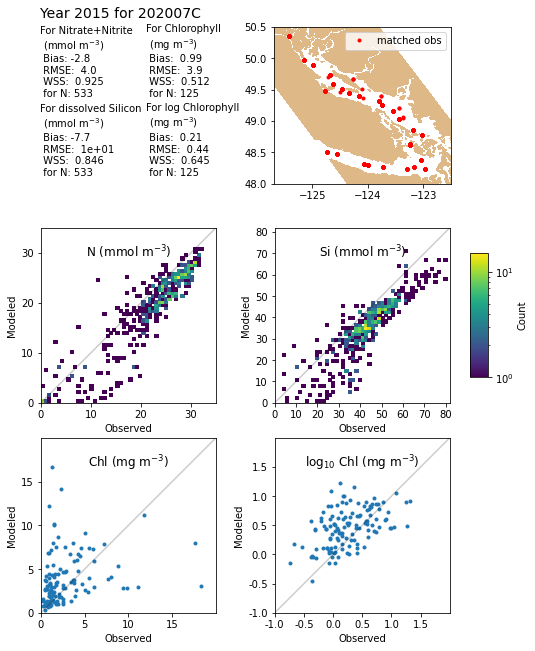

In [68]:
Plot_scatter_NS(data, 'Year 2015 for 202007C', 'y2015_202007C_DFO.png')

In [24]:
data = read_my_csv('~/202007/202007C/ObsModel_202007C_Bio_20160101-20160630.csv')

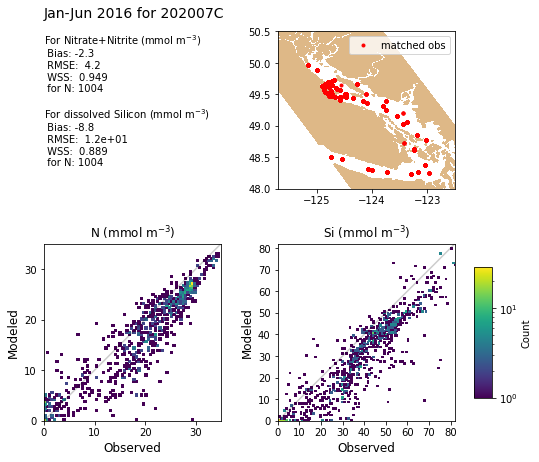

In [25]:
Plot_scatter_NS(data, 'Jan-Jun 2016 for 202007C', 'y2016fh_202007C.png')

In [26]:
data = read_my_csv('~/202007/202007C/ObsModel_202007C_Bio_20170101-20170630.csv')

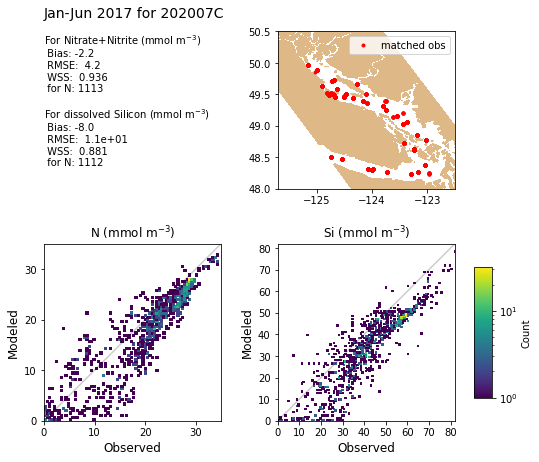

In [27]:
Plot_scatter_NS(data, 'Jan-Jun 2017 for 202007C', 'y2017fh_202007C.png')

In [71]:
data = read_my_csv('../PhysTuning/ObsModel_201812_Bio_20150101-20151231.csv')

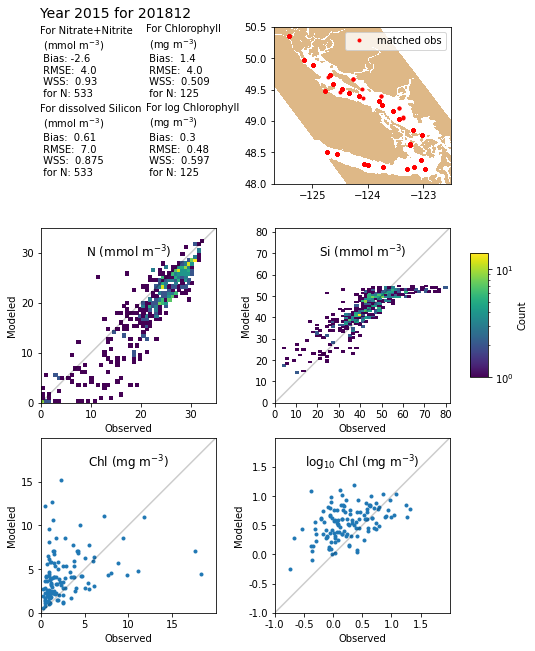

In [72]:
Plot_scatter_NS(data, 'Year 2015 for 201812', 'y2015_201812_DFO.png')

In [30]:
data = read_my_csv('../PhysTuning/ObsModel_201812_Bio_20160101-20160630.csv')

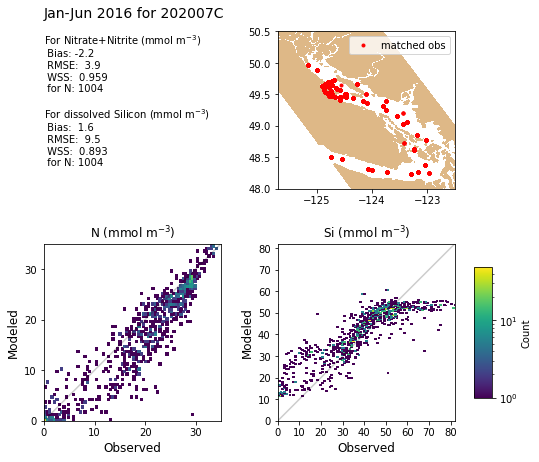

In [31]:
Plot_scatter_NS(data, 'Jan-Jun 2016 for 202007C', 'y2016fh_201812.png')

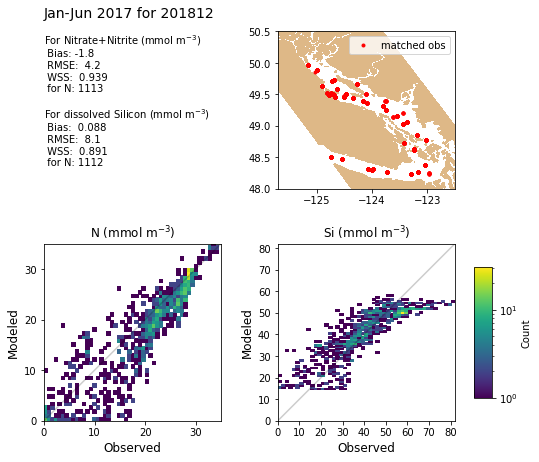

In [48]:
data = read_my_csv('../PhysTuning/ObsModel_201812_Bio_20170101-20170630.csv')
Plot_scatter_NS(data, 'Jan-Jun 2017 for 201812', 'y2017fh_201812.png')

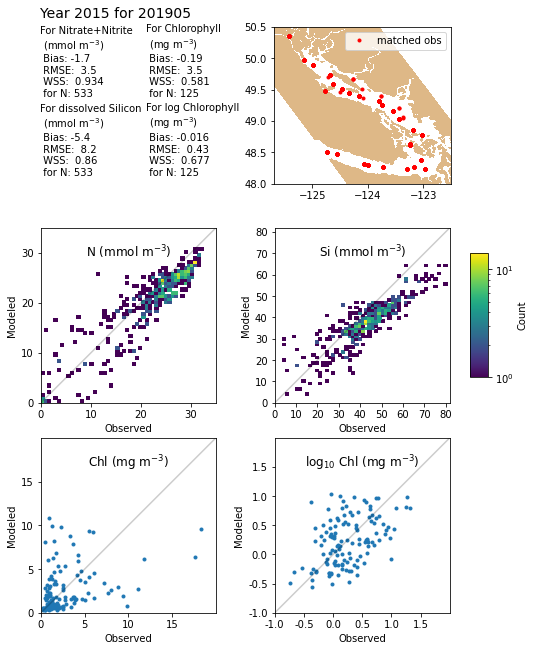

In [73]:
data = read_my_csv('../PhysTuning/ObsModel_201905_Bio_20150101-20151231.csv')
Plot_scatter_NS(data, 'Year 2015 for 201905', 'y2015_201905_DFO.png')

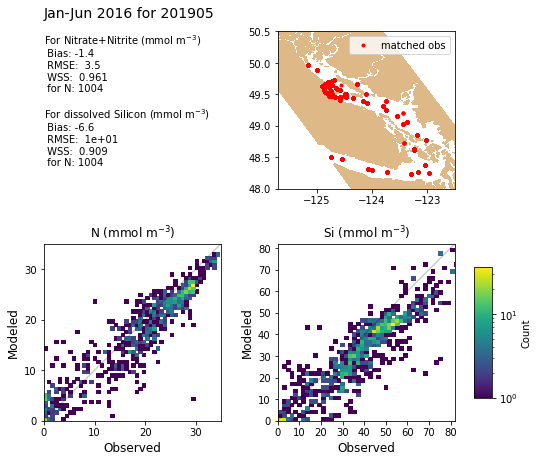

In [45]:
data = read_my_csv('../PhysTuning/ObsModel_201905_Bio_20160101-20160630.csv')
Plot_scatter_NS(data, 'Jan-Jun 2016 for 201905', 'y2016fh_201905.png')

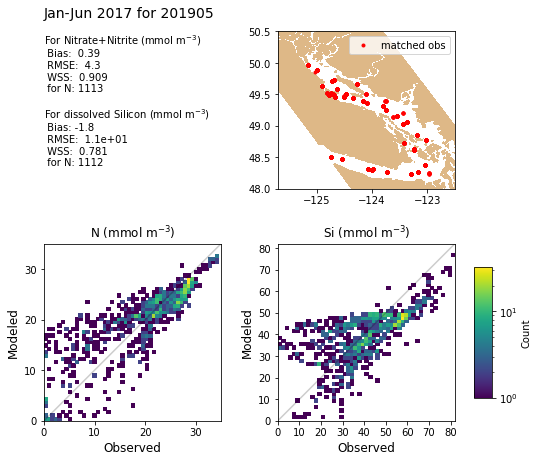

In [46]:
data = read_my_csv('../PhysTuning/ObsModel_201905_Bio_20170101-20170630.csv')
Plot_scatter_NS(data, 'Jan-Jun 2017 for 201905', 'y2017fh_201905.png')

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chl', 'Chlorophyll_Extracted_units', 'N',
       'Si', 'Silicate_units', 'AbsSal', 'ConsT', 'Z', 'dtUTC', 'j', 'i',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')


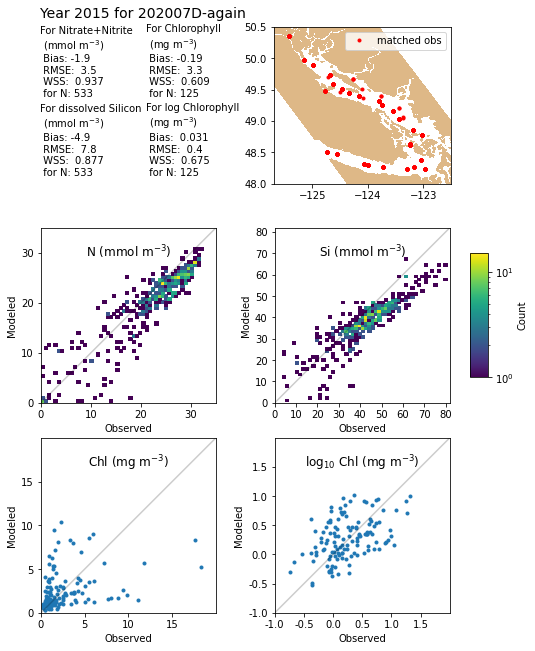

In [66]:
data = read_my_csv('/home/sallen/202007/202007D-again/ObsModel_202007D-again_Bio_20150101-20151231.csv')
print (data.keys())
Plot_scatter_NS(data, 'Year 2015 for 202007D-again', 'y2015_202007D-again_DFO.png')

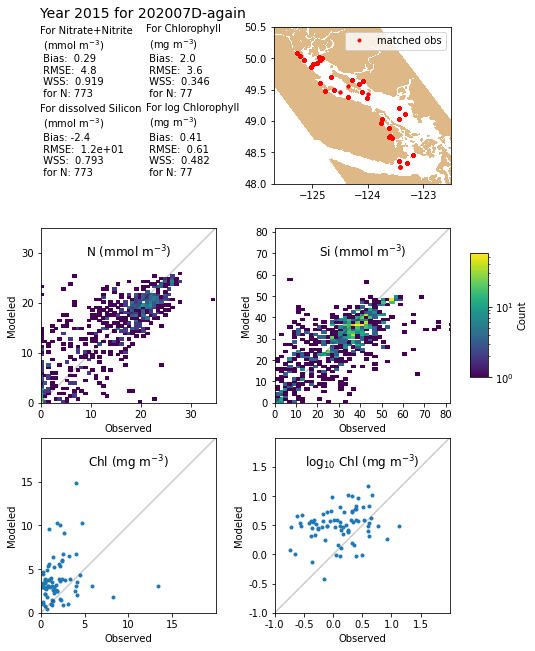

In [61]:
filename = '/home/sallen/202007/202007D-again/ObsModel_202007D-again_PSF_20150101-20151231.csv'
data = read_psf_csv(filename)
#print (data)

Plot_scatter_NS(data, 'Year 2015 for 202007D-again', 'y2015_202007D-again_PSF.png')

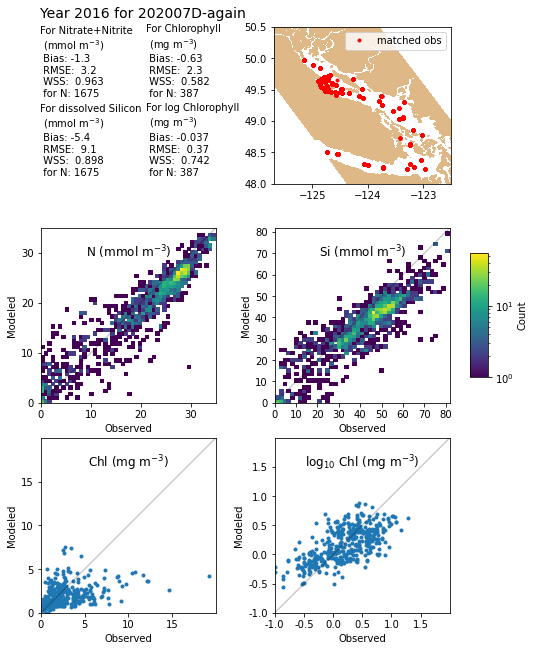

In [79]:
data = read_my_csv('/home/sallen/202007/202007D-again/ObsModel_202007D-again_Bio_20160101-20161231.csv')
Plot_scatter_NS(data, 'Year 2016 for 202007D-again', 'y2016_202007D-again_DFO.png')

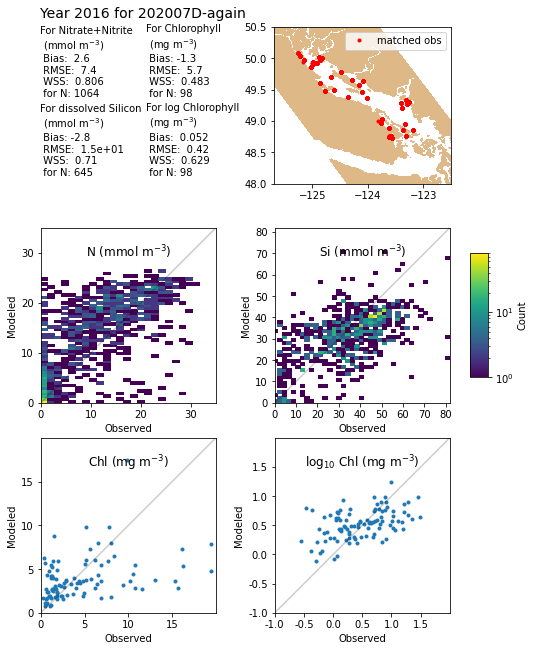

In [80]:
filename = '/home/sallen/202007/202007D-again/ObsModel_202007D-again_PSF_20160101-20161231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2016 for 202007D-again', 'y2016_202007D-again_PSF.png')

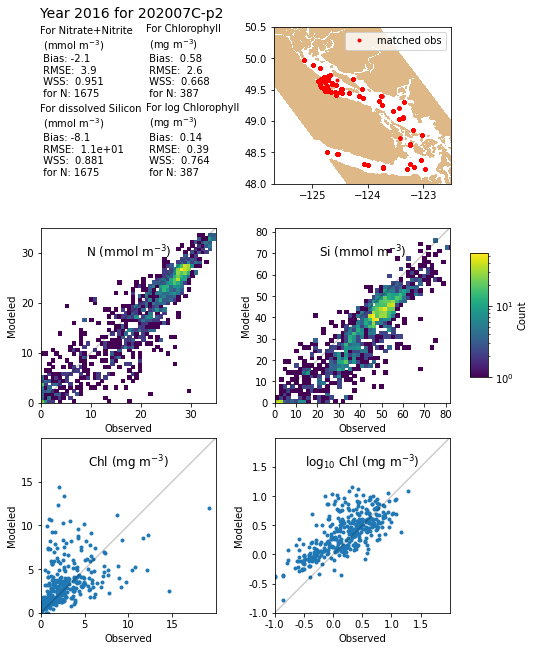

In [81]:
data = read_my_csv('/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_Bio_20160101-20161231.csv')
Plot_scatter_NS(data, 'Year 2016 for 202007C-p2', 'y2016_202007Cp2-again_DFO.png')

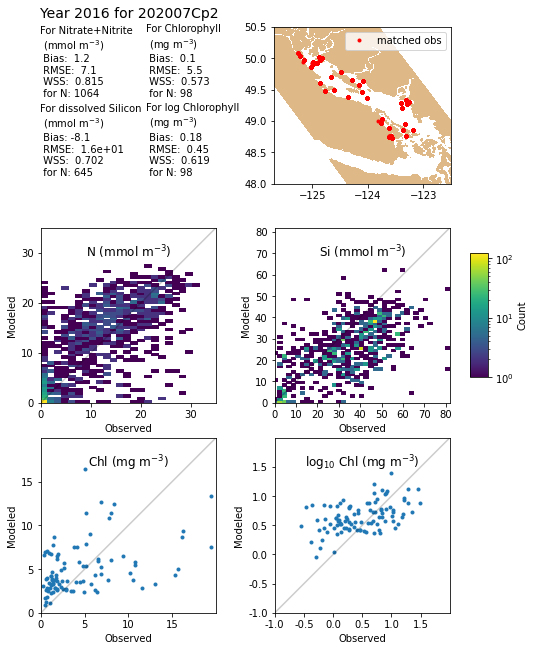

In [82]:
filename = '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_PSF_20160101-20161231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2016 for 202007Cp2', 'y2016_202007Cp2_PSF.png')

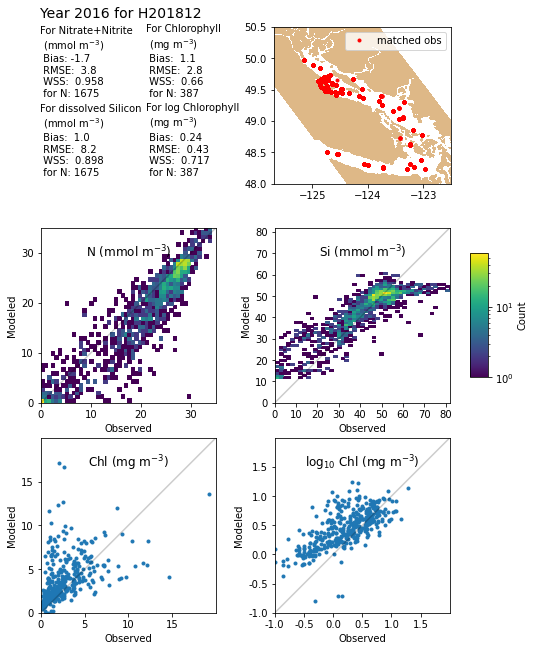

In [84]:
data = read_my_csv('../PhysTuning/ObsModel_201812_Bio_20160101-20161231.csv')
Plot_scatter_NS(data, 'Year 2016 for H201812', 'y2016_H201812_DFO.png')

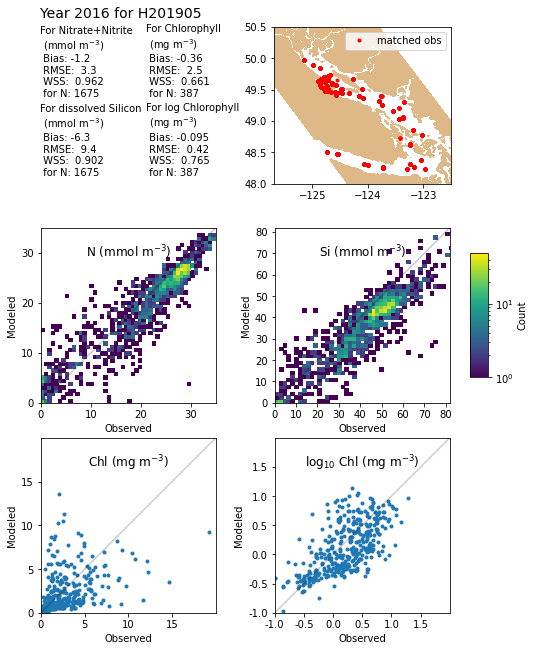

In [85]:
data = read_my_csv('../PhysTuning/ObsModel_201905_Bio_20160101-20161231.csv')
Plot_scatter_NS(data, 'Year 2016 for H201905', 'y2016_H201905_DFO.png')

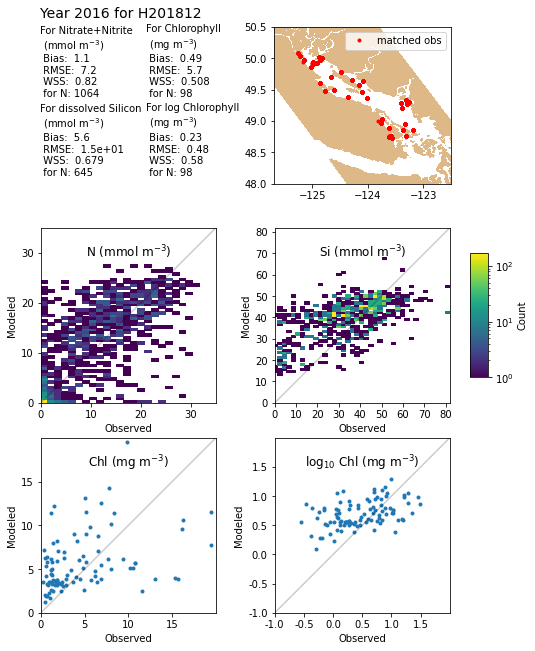

In [89]:
filename = '../PhysTuning/ObsModel_201812_PSF_20160101-20161231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2016 for H201812', 'y2016_201812_PSF.png')

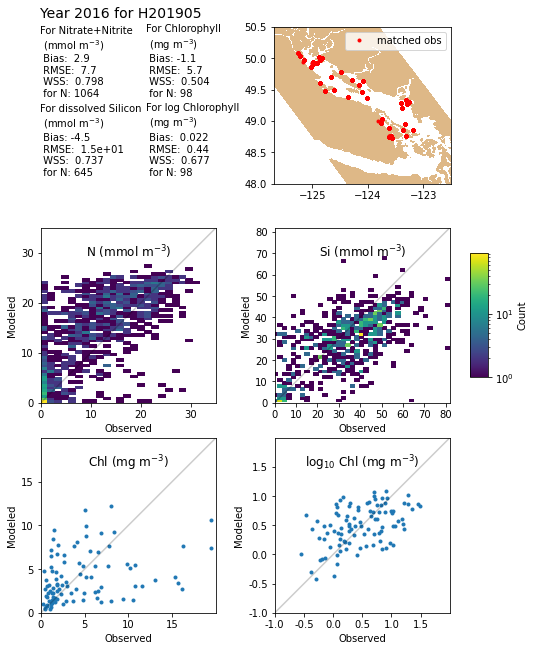

In [87]:
filename = '../PhysTuning/ObsModel_201905_PSF_20160101-20161231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2016 for H201905', 'y2016_201905_PSF.png')

In [186]:
data1 = read_my_csv('/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_Bio_20160101-20161231.csv')
data2 = read_my_csv('/home/sallen/202007/202007D-again/ObsModel_202007D-again_Bio_20160101-20161231.csv')

In [187]:
data = data1.copy(deep=True)

In [135]:
data.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chl', 'Chlorophyll_Extracted_units', 'N',
       'Si', 'Silicate_units', 'AbsSal', 'ConsT', 'Z', 'dtUTC', 'j', 'i',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')

In [188]:
for key in ['Ammonium', 'Chl', 'N',
       'Si', 'AbsSal', 'ConsT', 
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper']:
    data[key] = (data1[key] + data2[key])/2.

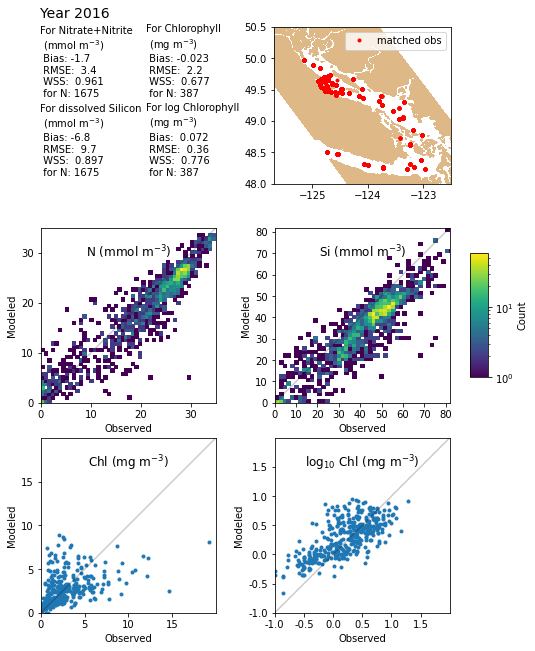

In [137]:
Plot_scatter_NS(data, 'Year 2016', 'y2016.png')

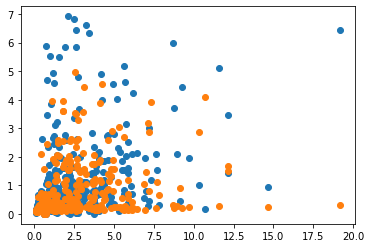

In [139]:
plt.scatter(data['Chl'], 2*data['mod_diatoms'])
plt.scatter(data['Chl'], 2*data['mod_flagellates'])

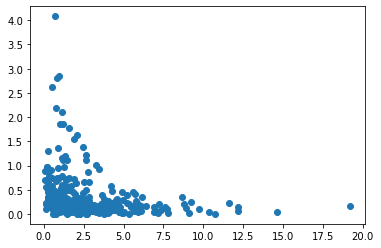

In [144]:
plt.scatter(data['Chl'], data['mod_diatoms']/data['Chl'])

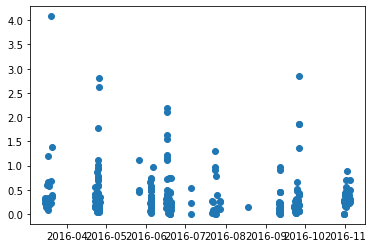

In [143]:
plt.scatter(data.index, data['mod_diatoms']/data['Chl'])

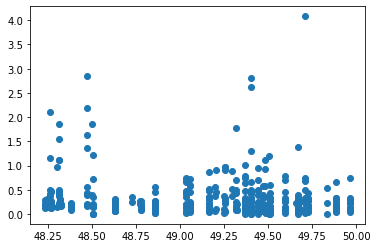

In [146]:
plt.scatter(data.Lat, data['mod_diatoms']/data['Chl'])

In [152]:
outliers = data[data['mod_diatoms']/data['Chl'] > 2]

In [159]:
outliers[['Lat', 'Lon', 'Depth', 'Chl', 'mod_diatoms']]

,Lat,Lon,Depth,Chl,mod_diatoms
datetime,,,,,
2016-03-19 02:59:44.000001600,49.705333,-124.718167,NaN,0.72,2.939855
2016-04-25 18:00:47.000001600,49.401333,-123.753833,NaN,0.83,2.337331
2016-04-25 18:00:47.000001600,49.401333,-123.753833,NaN,0.50,1.306352
2016-06-16 17:37:27.999998400,48.470500,-124.547667,NaN,0.79,1.729335
2016-06-17 01:12:02.999998800,48.260000,-123.720333,NaN,1.17,2.467455
2016-09-26 11:42:47.000001600,48.470333,-124.547667,NaN,0.97,2.765081


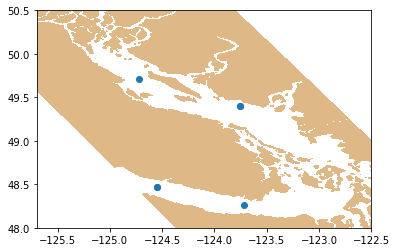

In [151]:
fig, axM = plt.subplots(1, 1)
axM.plot(data[data['mod_diatoms']/data['Chl'] > 2].Lon, data[data['mod_diatoms']/data['Chl'] > 2].Lat, 'o')
bathy = '/home/sallen/MEOPAR/grid/bathymetry_201702.nc'
viz_tools.plot_land_mask(axM, bathy, coords='map', color='burlywood')
axM.set_ylim(48, 50.5)
axM.set_xlim(-125.7, -122.5);

In [171]:
sm = 10**(-0.5)

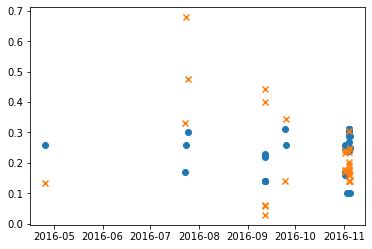

In [174]:
plt.scatter(data.index[data.Chl < sm], data['Chl'][data.Chl < sm])
plt.scatter(data.index[data.Chl < sm], 2*data['mod_diatoms'][data.Chl < sm], marker='x');

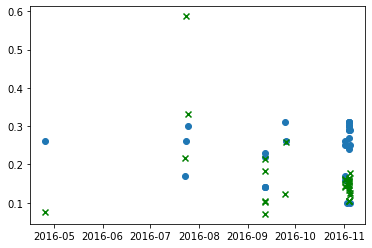

In [175]:
plt.scatter(data.index[data.Chl < sm], data['Chl'][data.Chl < sm])
plt.scatter(data.index[data.Chl < sm], 2*data['mod_flagellates'][data.Chl < sm], marker='x', color='g');

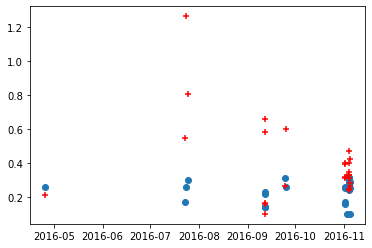

In [177]:
plt.scatter(data.index[data.Chl < sm], data['Chl'][data.Chl < sm])
plt.scatter(data.index[data.Chl < sm], 2*(data['mod_flagellates'][data.Chl < sm]
                                          +data['mod_diatoms'][data.Chl < sm]), marker='+', color='r');

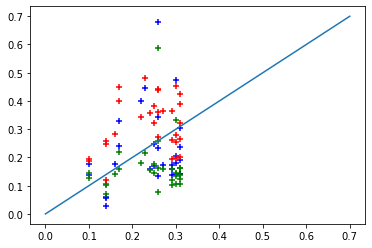

In [190]:
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_diatoms'][data.Chl < sm], marker='+', color='b');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_flagellates'][data.Chl < sm], marker='+', color='g');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_ciliates'][data.Chl < sm], marker='+', color='r');
plt.plot(np.arange(0, 0.8, 0.1), np.arange(0, 0.8, 0.1))

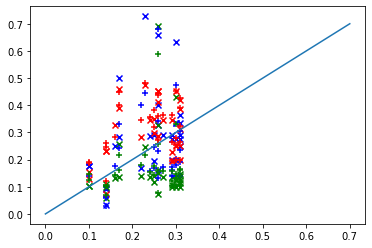

In [193]:
plt.scatter(data1.Chl[data.Chl < sm], 2*data1['mod_diatoms'][data.Chl < sm], marker='x', color='b');
plt.scatter(data1.Chl[data.Chl < sm], 2*data1['mod_flagellates'][data.Chl < sm], marker='x', color='g');
plt.scatter(data1.Chl[data.Chl < sm], 2*data1['mod_ciliates'][data.Chl < sm], marker='x', color='r');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_diatoms'][data.Chl < sm], marker='+', color='b');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_flagellates'][data.Chl < sm], marker='+', color='g');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_ciliates'][data.Chl < sm], marker='+', color='r');
plt.plot(np.arange(0, 0.8, 0.1), np.arange(0, 0.8, 0.1));

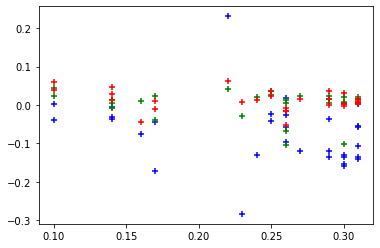

In [199]:
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_diatoms'][data.Chl < sm] 
            - 2*data1['mod_diatoms'][data.Chl < sm], marker='+', color='b');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_flagellates'][data.Chl < sm] -
            2*data1['mod_flagellates'][data.Chl < sm], marker='+', color='g');
plt.scatter(data.Chl[data.Chl < sm], 2*data['mod_ciliates'][data.Chl < sm] -
            2*data1['mod_ciliates'][data.Chl < sm], marker='+', color='r');

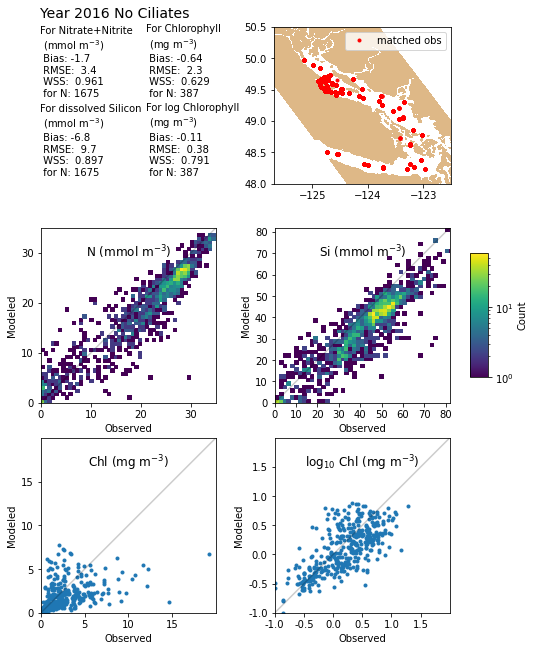

In [183]:
data['mod_ciliates'] = data['mod_ciliates']*0.
Plot_scatter_NS(data, 'Year 2016 No Ciliates', 'y2016_nocil.png')

In [126]:
filename = filename = '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_PSF_20160101-20161231.csv'
data1 = read_psf_csv(filename)
filename = '/home/sallen/202007/202007D-again/ObsModel_202007D-again_PSF_20160101-20161231.csv'
data2 = read_psf_csv(filename)

In [127]:
data = data1.copy(deep=True)

In [128]:
data.keys()

Index(['Unnamed: 0', 'Lat', 'Lon', 'N', 'PO4', 'Si', 'Station', 'Z', 'Chl',
       'Depth_m', 'Phaeo', 'SA', 'CT', 'pLat', 'pLon', 'tdiffH', 'j', 'i',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper', 'k'],
      dtype='object')

In [129]:
for key in ['N', 'PO4', 'Si', 'Chl',
       'SA', 'CT',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper']:
    data[key] = (data1[key] + data2[key])/2.

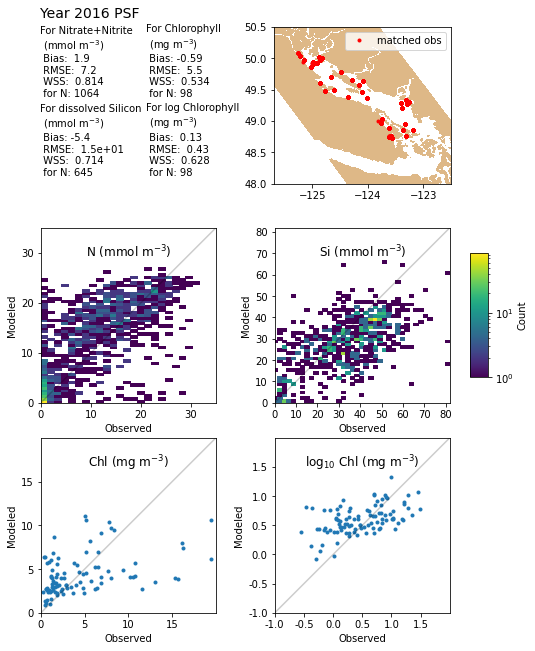

In [130]:
Plot_scatter_NS(data, 'Year 2016 PSF', 'y2016_psf.png')

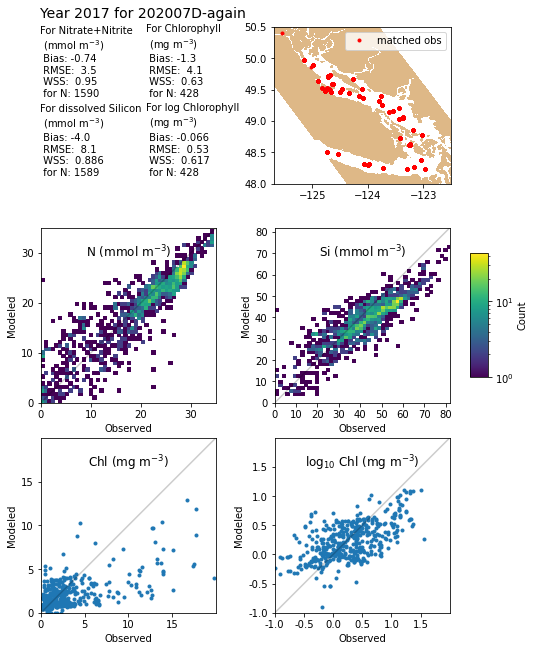

In [201]:
filename = '/home/sallen/202007/202007D-again/ObsModel_202007D-again_Bio_20170101-20171231.csv'
data = read_my_csv(filename)
Plot_scatter_NS(data, 'Year 2017 for 202007D-again', 'y2017_202007D-again_PSF.png')

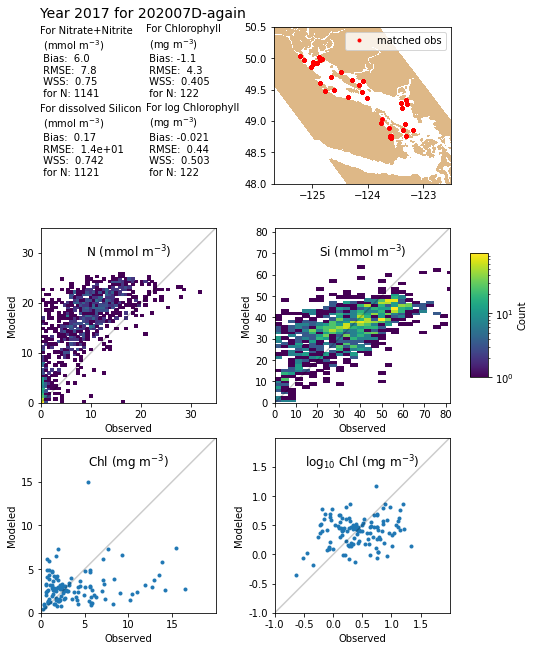

In [202]:
filename = '/home/sallen/202007/202007D-again/ObsModel_202007D-again_PSF_20170101-20171231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2017 for 202007D-again', 'y2017_202007D-again_PSF.png')

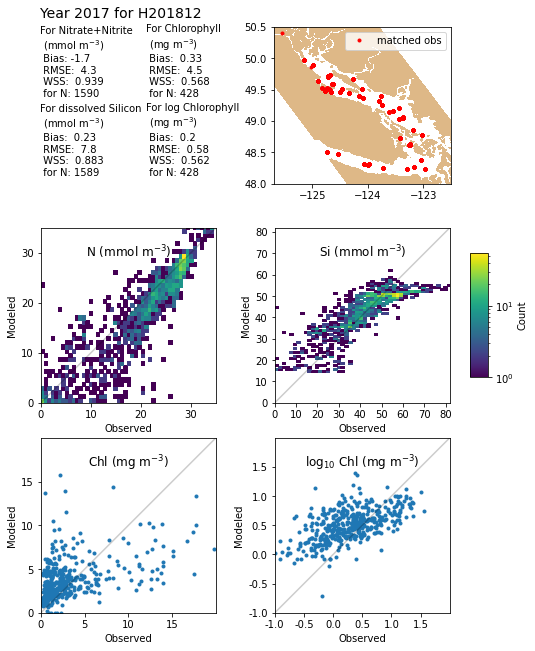

In [203]:
data = read_my_csv('../PhysTuning/ObsModel_201812_Bio_20170101-20171231.csv')
Plot_scatter_NS(data, 'Year 2017 for H201812', 'y2017_H201812_DFO.png')

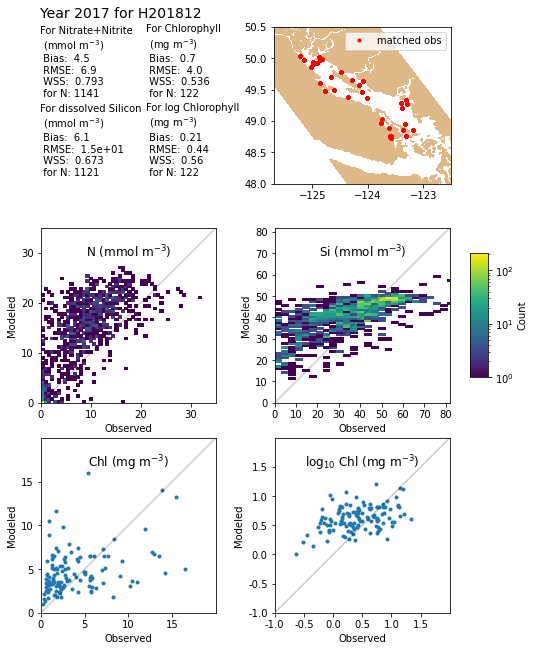

In [204]:
data = read_psf_csv('../PhysTuning/ObsModel_201812_PSF_20170101-20171231.csv')
Plot_scatter_NS(data, 'Year 2017 for H201812', 'y2017_H201812_PSF.png')

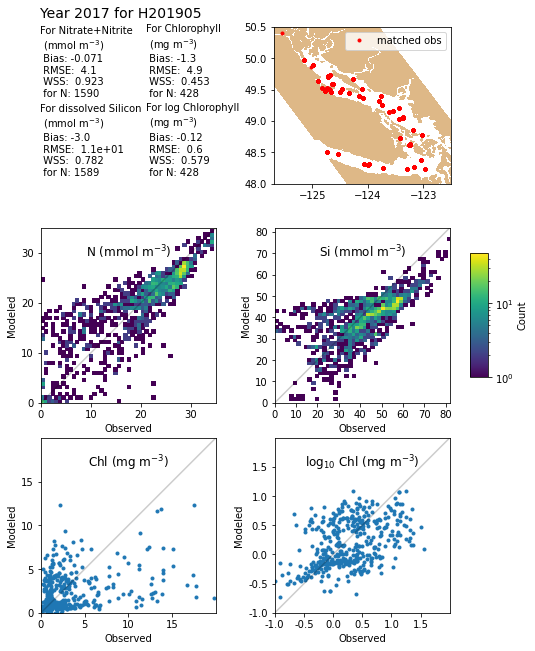

In [205]:
data = read_my_csv('../PhysTuning/ObsModel_201905_Bio_20170101-20171231.csv')
Plot_scatter_NS(data, 'Year 2017 for H201905', 'y2017_H201905_DFO.png')

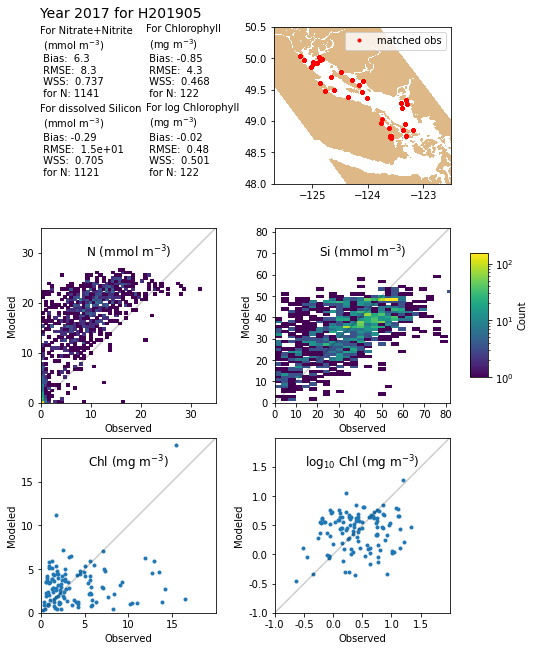

In [206]:
data = read_psf_csv('../PhysTuning/ObsModel_201905_PSF_20170101-20171231.csv')
Plot_scatter_NS(data, 'Year 2017 for H201905', 'y2017_H201905_PSF.png')

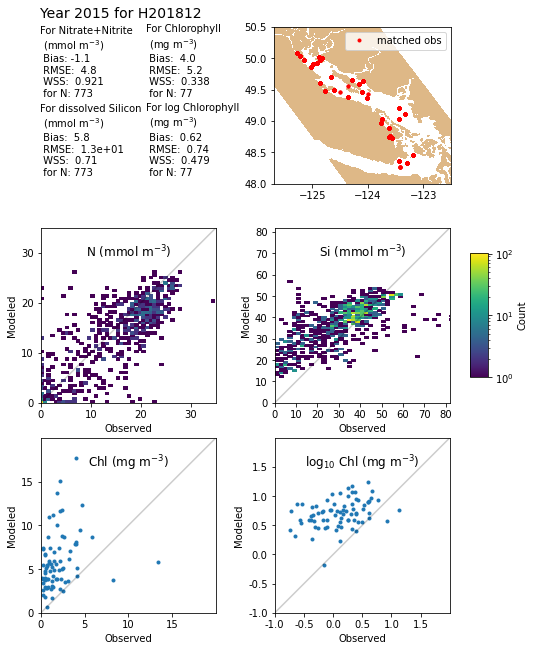

In [207]:
data = read_psf_csv('../PhysTuning/ObsModel_201812_PSF_20150101-20151231.csv')
Plot_scatter_NS(data, 'Year 2015 for H201812', 'y2015_H201812_PSF.png')

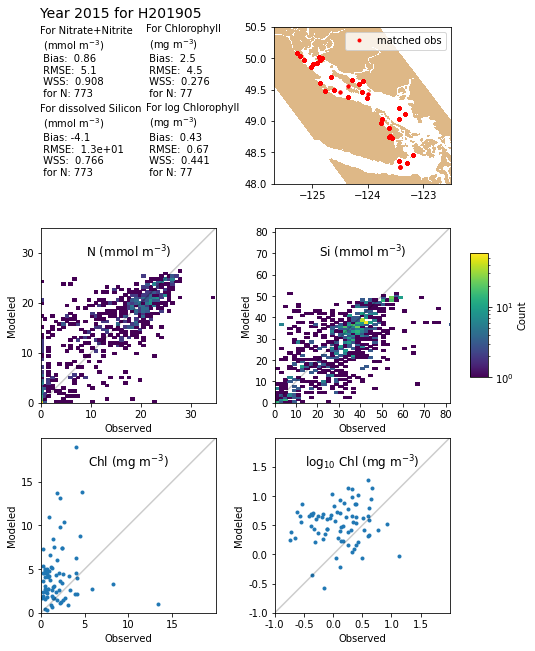

In [208]:
data = read_psf_csv('../PhysTuning/ObsModel_201905_PSF_20150101-20151231.csv')
Plot_scatter_NS(data, 'Year 2015 for H201905', 'y2015_H201905_PSF.png')

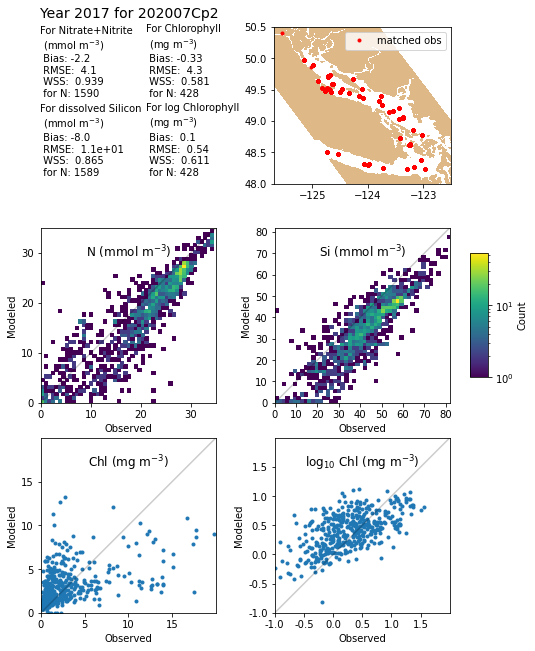

In [8]:
filename = '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_Bio_20170101-20171231.csv'
data = read_my_csv(filename)
Plot_scatter_NS(data, 'Year 2017 for 202007Cp2', 'y2017_202007Cp2_Bio.png')

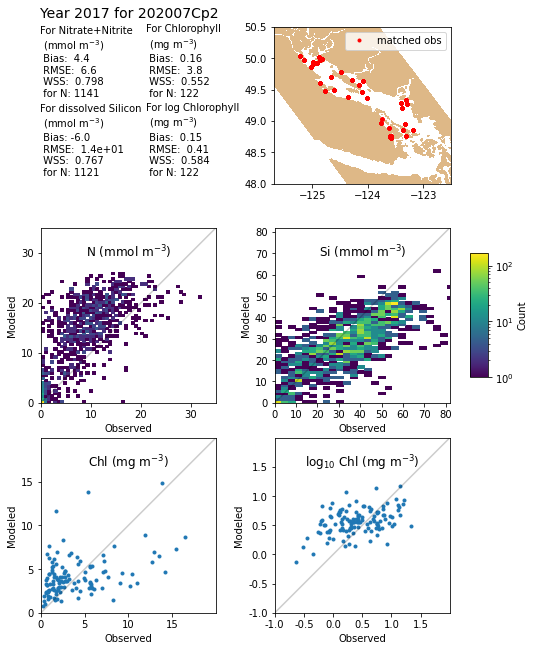

In [9]:
filename = '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_PSF_20170101-20171231.csv'
data = read_psf_csv(filename)
Plot_scatter_NS(data, 'Year 2017 for 202007Cp2', 'y2017_202007Cp2_PSF.png')